In [296]:
import geopandas as gpd
import pandas as pd
import os
import parcelfunks
import numpy as np
from scipy import stats
import shutil
from glob import glob

In [88]:
mhomesPath = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\08001_mhps_OG.gpkg'

In [89]:
parcelsPath = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp'

In [90]:
mhomes = gpd.read_file(mhomesPath, layer='08001_mhps_OG_prepped').to_crs(crs='ESRI:102003')

In [61]:
mhomes.to_file(mhomesPath, layer='mhomes_OG_albers')

In [97]:
parcel = gpd.read_file(parcelsPath).to_crs(crs='ESRI:102003')

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [63]:
mhomes.crs == parcel.crs

True

In [13]:
def geomLen(geom):
    return len(geom.exterior.xy[0])

def geomZscore(geom):
    return stats.zscore(len(geom.exterior.xy[0]))

In [98]:
parcel.drop_duplicates(subset=['geometry'], inplace=True)
parcel = parcel.explode(index_parts=False)
parcel['polyLen1'] = parcel.apply(lambda row: geomLen(row.geometry), axis=1)
parcel['geomZscore1'] = np.abs(stats.zscore(parcel['polyLen1']))
parcel['geometry'] = parcel['geometry'].simplify(1)
parcel['polyLen2'] = parcel.apply(lambda row: geomLen(row.geometry), axis=1)
parcel['geomZscore2'] = np.abs(stats.zscore(parcel['polyLen2']))
#parcel.drop(parcel[parcel.geomZscore > 3].index, inplace=True)
#parcel.reset_index(inplace=True)
columns = ['APN', 'APN2', 'polyLen1', 'geomZscore1', 'polyLen2', 'geomZscore2','geometry']
drops = [c for c in parcel.columns if c not in columns]
parcel.drop(drops, axis=1, inplace=True)        
#mobileHomes = gpd.read_file(mhpPath)
if parcel.crs != mhomes.crs:
    parcel.to_crs(mhomes.crs, inplace=True)
phomes_sjoin = gpd.sjoin(parcel,mhomes)
phomes_sjoin.drop('index_right', axis=1, inplace=True)
phomes_near = gpd.sjoin_nearest(parcel, mhomes, max_distance=5.0, distance_col='distances')
phomes_near.drop('index_right', axis=1, inplace=True)
phomes_near = phomes_near.sort_values(['MHPID','distances']).drop_duplicates(subset=['MHPID'], keep='first')



In [33]:
len(phomes_sjoin)

12

In [34]:
len(phomes_near)

26

In [99]:
phomes_near.to_file(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\08001_OG.gpkg', layer='MH_parcels_near')

In [37]:
phomes_sjoin.to_file(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08069\08069_OG.gpkg', layer='MH_parcels')

In [11]:
len(parcel)

103394

In [12]:
parcel.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
mhomes.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
mhomes_albers = mhomes.to_crs(crs='ESRI:102003')

In [20]:
mhomes_albers.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: USA - CONUS - onshore
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [2]:
parcelsPath = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp'

In [3]:
parcels = gpd.read_file(parcelsPath)

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [4]:
parcels.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [5]:
parcels = parcels.to_crs(crs = 'ESRI:102003')

In [7]:
blocks = gpd.read_file(os.path.join(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001','08001_blocks.gpkg'), layer='08001_blocks')

In [9]:
blocks.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [203]:
CO_path = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties'
#CO_pInventory = pInventory.loc[pInventory['STATE']=='08']
CO_pInventory = pd.read_csv(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\counties\ColoradoInventory.csv', dtype={'STATE':str,'COUNTY':str})
CO_pInventory_True = CO_pInventory.loc[CO_pInventory['DATA_PRESENT']==True]
CO_pInventory_False = CO_pInventory.loc[CO_pInventory['DATA_PRESENT']==False]
CO_pInventory_False.to_csv(os.path.join(CO_path,'missingParcelData.csv')) # need to get this to work
fipsList = CO_pInventory_True['COUNTY'].tolist()   
parcelsPaths = [os.path.join(CO_path,fips) for fips in fipsList]

In [204]:
co_22_dir = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022'
unionDF = pd.DataFrame()
joinDF = pd.DataFrame()
for path in parcelsPaths:
    fips = path.split('\\')[-1]
    if os.path.exists(os.path.join(path,fips+'.gpkg')):
        union = gpd.read_file(os.path.join(path, fips+'.gpkg'),layer='MH_parc_blk_union')
        unionDF = pd.concat([unionDF,union])
        join = gpd.read_file(os.path.join(path, fips+'.gpkg'),layer='MH_parcels')
        joinDF = pd.concat([joinDF,join])        
unionDF.to_file(os.path.join(co_22_dir,'Colorado_Final_near.gpkg'),layer='Colorado_Final_union')
#joinDF['polyLen_3'] = joinDF.apply(lambda row: geomLen(row.geometry), axis=1)
#joinDF['geomZscore_3'] = np.abs(stats.zscore(joinDF['polyLen2']))
joinDF.to_file(os.path.join(co_22_dir, 'Colorado_Final_near.gpkg'),layer='Colorado_Final_MH_parcels')

Blow up old ones

In [200]:
for fips, path in zip(fipsList,parcelsPaths):
    if os.path.exists(os.path.join(path,fips+'.gpkg')):
        os.remove((os.path.join(path,fips+'.gpkg')))

Larimer

In [18]:
larmier = gpd.read_file(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08069\parcels.shp')

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08069\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [24]:
type(larmier['APN'][0])

str

Working on dropping non-nearest joins

In [47]:
boco = gpd.read_file(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08013\08013_OG.gpkg', layer='MH_parcels_near')

In [48]:
boco.columns

Index(['APN', 'APN2', 'polyLen', 'geomZscore', 'MHPID', 'MH_NAME',
       'MH_ADDRESS', 'MH_CITY', 'MH_STATE', 'MH_ZIP', 'MH_STATUS',
       'MH_COUNTY_FIPS', 'MH_LATITUDE', 'MH_LONGITUDE', 'distances',
       'geometry'],
      dtype='object')

In [63]:
dupMHPIDs = boco.loc[boco['MHPID'].duplicated() == True]['MHPID']

In [66]:
boco.columns

Index(['APN', 'APN2', 'polyLen', 'geomZscore', 'MHPID', 'MH_NAME',
       'MH_ADDRESS', 'MH_CITY', 'MH_STATE', 'MH_ZIP', 'MH_STATUS',
       'MH_COUNTY_FIPS', 'MH_LATITUDE', 'MH_LONGITUDE', 'distances',
       'geometry'],
      dtype='object')

In [72]:
boco_group = boco.groupby(['MHPID', 'distances']).first()

this works

In [ ]:
boco.sort_values(['MHPID','distances']).drop_duplicates(subset=['MHPID'], keep='first')

Simplifying geometry

In [ ]:
parcel['geometry'] = parcel['geometry'].simplify(1)

In [106]:
colorado = gpd.read_file(r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Colorado_Final_near.gpkg', layer='Colorado_Final_MH_parcels')

In [107]:
len(colorado)

418

In [124]:
len(colorado['geometry'][107].exterior.xy[0] + len(colorado['geometry'][107].interiors.xy[0]))

AttributeError: 'InteriorRingSequence' object has no attribute 'xy'

In [172]:
interiors = colorado['geometry'][107].interiors

In [171]:
interiors[0]

IndexError: index out of range

In [162]:
len(interiors[0].xy[0])


5

In [134]:
total = 0
for g in interiors:
    total += len(g.xy[0])

In [135]:
total

1608

In [136]:
interiorSum = sum([len(g.xy[0]) for g in interiors])

In [137]:
interiorSum

1608

In [176]:
geom = colorado['geometry'][106]

In [177]:
def geomLen(geom):
    exterior = len(geom.exterior.xy[0])
    interior = sum([len(g.xy[0]) for g in geom.interiors]) if len(geom.interiors) > 0 else 0
    return exterior+interior

In [180]:
def geomLenOld(geom):
    exterior = len(geom.exterior.xy[0])
    #interior = sum([len(g.xy[0]) for g in geom.interiors]) if len(geom.interiors) > 0 else 0
    return exterior

In [182]:
x = geomLen(geom)
print(x)

10


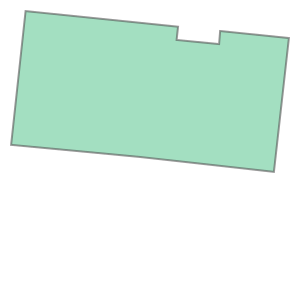

In [179]:
geom

Adding buildings

In [208]:
parcelAtlas_path = r'C:\Users\phwh9568\Data\ParcelAtlas'

In [210]:
US_county_fips = pd.read_csv(os.path.join(parcelAtlas_path, 'US_county_fips.csv'), dtype={'FIPS':str})

In [234]:
co_county_fips = dict(zip(colorado_county_fips['FIPS'].to_list(), colorado_county_fips['Name'].to_list()))

In [272]:
county_dir = r'C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties'
buildings_dir = r'C:\Users\phwh9568\Data\Colorado_Microsoft_Footprints'

In [320]:
for f,n in co_county_fips.items():
    if os.path.exists(os.path.join(county_dir,f)):
        name = n.replace(' ','_')+'_Buildings'
        files = glob(os.path.join(buildings_dir,name,name+'*'))
        for src in files:
            dst = os.path.join(county_dir,f,f+'_'+src.split('_')[-1].lower())
            shutil.copy(src, dst)
        #src = os.path.join(buildings_dir,name,name+'.shp')
        #dst = (os.path.join(county_dir,f,f+'_buildings.shp'))
        #shutil.copy(src,dst)


blow up old ones

In [294]:
for f,n in co_county_fips.items():
    path = os.path.join(county_dir, f+'_buildings.shp')
    if os.path.exists(path):
        os.remove(path)

In [474]:
co_county_fips

{'08001': 'Adams County',
 '08003': 'Alamosa County',
 '08005': 'Arapahoe County',
 '08007': 'Archuleta County',
 '08009': 'Baca County',
 '08011': 'Bent County',
 '08013': 'Boulder County',
 '08015': 'Chaffee County',
 '08017': 'Cheyenne County',
 '08019': 'Clear Creek County',
 '08021': 'Conejos County',
 '08023': 'Costilla County',
 '08025': 'Crowley County',
 '08027': 'Custer County',
 '08029': 'Delta County',
 '08031': 'Denver County',
 '08033': 'Dolores County',
 '08035': 'Douglas County',
 '08037': 'Eagle County',
 '08039': 'Elbert County',
 '08041': 'El Paso County',
 '08043': 'Fremont County',
 '08045': 'Garfield County',
 '08047': 'Gilpin County',
 '08049': 'Grand County',
 '08051': 'Gunnison County',
 '08053': 'Hinsdale County',
 '08055': 'Huerfano County',
 '08057': 'Jackson County',
 '08059': 'Jefferson County',
 '08061': 'Kiowa County',
 '08063': 'Kit Carson County',
 '08065': 'Lake County',
 '08067': 'La Plata County',
 '08069': 'Larimer County',
 '08071': 'Las Animas Co

Sum of Buildings within parcels

In [468]:
adams = gpd.read_file(os.path.join(county_dir,'08001', 'parcels.shp')).to_crs('ESRI:102003')

c:\Users\phwh9568\AppData\Local\Continuum\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:194: RuntimeWarning: C:\Users\phwh9568\Data\ParcelAtlas\CO_2022\Counties\08001\parcels.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  result = ogr_read(


In [469]:
adams['ID'] = adams.index
cols = adams.columns.to_list()
cols = [cols[-1]] + cols[:-1] 

In [472]:
adams = adams[cols]

In [473]:
adams.columns

Index(['ID', 'APN', 'APN2', 'STATE', 'COUNTY', 'FIPS', 'SIT_HSE_NU', 'SIT_DIR',
       'SIT_STR_NA', 'SIT_STR_SF', 'SIT_FULL_S', 'SIT_CITY', 'SIT_STATE',
       'SIT_ZIP', 'SIT_ZIP4', 'LAND_VALUE', 'IMPR_VALUE', 'TOT_VALUE',
       'ASSMT_YEAR', 'REC_DATE', 'SALES_PRIC', 'YEAR_BUILT', 'STD_LAND_U',
       'LOT_SIZE', 'BLDG_AREA', 'DEED_DSCR', 'NO_OF_STOR', 'NO_OF_UNIT',
       'BEDROOMS', 'BATHROOMS', 'OWNER', 'OWNER2', 'OWNADDRESS', 'OWNADDRES2',
       'OWNCTYSTZP', 'XCOORD', 'YCOORD', 'MINX', 'MINY', 'MAXX', 'MAXY',
       'VERSION', 'QUANTARIUM', 'ATTDATE', 'geomCalc', 'geometry'],
      dtype='object')

In [443]:
adamsBuildings = gpd.read_file(os.path.join(county_dir,'08001','08001_buildings.shp')).to_crs('ESRI:102003')

In [444]:
dfsjoin = gpd.sjoin(adams, adamsBuildings, predicate='contains') #Spatial join Points to polygons

In [445]:
dfpivot = pd.pivot_table(dfsjoin,index=['ID','APN'], aggfunc={'FID':len}).reset_index()

In [447]:
dfpolynew = adams.merge(dfpivot, how='left', on='ID')

In [455]:
dfpolynew.rename({'APN_x':'APN', 'FID': 'Build_Count'}, axis='columns',inplace=True)

In [457]:
dfpolynew['Build_Count'].fillna(0, inplace=True)

In [459]:
dfpolynew.drop(['ID','APN_y'], axis=1, inplace=True)

In [464]:
def sumWithin(df1,df2):
    dfsjoin = gpd.sjoin(df1,df2,predicate='contains')
    dfpivot = pd.pivot_table(dfsjoin,index=['ID','APN'], aggfunc={'FID':len}).reset_index()
    dfpolynew = df1.merge(dfpivot, how='left', on='ID')
    dfpolynew.rename({'APN_x':'APN', 'FID': 'Sum_Within'}, axis='columns',inplace=True)
    dfpolynew['Sum_Within'].fillna(0, inplace=True)
    dfpolynew.drop(['ID','APN_y'], axis=1, inplace=True)
    return dfpolynew


In [461]:
len(adams)

118838

In [465]:
testdf = sumWithin(adams,adamsBuildings)

In [467]:
testdf

,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,SIT_FULL_S,...,MINX,MINY,MAXX,MAXY,VERSION,QUANTARIUM,ATTDATE,geomCalc,geometry,Sum_Within
0,155700000045,1,CO,Adams,08001,None,None,None,None,None,...,-104.066892,39.978658,-104.057487,39.985909,12/20/2016,None,20211030,630151.6230,"POLYGON ((-681231.654 306696.813, -681999.276 ...",0.0
1,155700000007,2,CO,Adams,08001,None,None,None,None,None,...,-104.067448,39.996597,-104.057978,40.001045,12/20/2016,None,20211030,384020.4328,"POLYGON ((-681449.948 309232.732, -681450.962 ...",0.0
2,155700000150,3,CO,Adams,08001,None,None,None,None,None,...,-104.057782,39.993095,-104.038983,39.997066,12/20/2016,None,20211030,669224.3293,"POLYGON ((-679532.942 308190.972, -680326.252 ...",0.0
3,155700000149,4,CO,Adams,08001,None,None,None,None,None,...,-104.053055,39.996835,-104.039052,40.000994,12/20/2016,None,20211030,532267.7586,"POLYGON ((-680646.427 309153.695, -680646.245 ...",0.0
4,155700000006,5,CO,Adams,08001,16704,None,MIMOSA MILE,RD,16704 MIMOSA MILE RD,...,-104.057856,39.996766,-104.052995,40.000949,12/20/2016,22098024,20211030,187514.4901,"POLYGON ((-680680.353 308693.941, -681061.940 ...",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118833,181333111009,166570,CO,Adams,08001,None,None,None,None,166570 2315 TROUT RD,...,-104.330532,39.749104,-104.330119,39.749356,12/20/2016,None,20211030,977.4080,"POLYGON ((-706475.383 283060.727, -706510.315 ...",0.0
118834,182504302022,166571,CO,Adams,08001,None,None,None,None,166571 2125 W 64TH AVE,...,-105.012647,39.812962,-105.010913,39.813580,12/20/2016,None,20211030,5394.8983,"POLYGON ((-763401.996 295518.311, -763365.602 ...",0.0
118835,182504302021,166572,CO,Adams,08001,None,None,None,None,166572 2075 W 64TH AVE,...,-105.014805,39.812963,-105.011479,39.815228,12/20/2016,22244250,20211030,40742.1354,"POLYGON ((-763622.608 295727.276, -763483.233 ...",0.0
118836,182504302020,166573,CO,Adams,08001,None,None,None,None,166573 2175 W 64TH AVE,...,-105.012533,39.813529,-105.009931,39.815120,12/20/2016,None,20211030,21055.6189,"POLYGON ((-763366.706 295686.630, -763315.925 ...",0.0
